In [5]:
import pandas as pd
import folium

In [6]:
well_locations = pd.read_csv("data/MannvilleWells_LatLong.csv")

In [7]:
well_locations.shape

(2193, 8)

In [8]:
well_center_coord = [55.736558, -112.615421]

map_wells = folium.Map(location=well_center_coord, zoom_start=7,tiles='cartodbpositron', width = 640, height=480)

for index, row in well_locations.iterrows():
  folium.CircleMarker(location=[row['lat'], row['lng']], radius=1).add_to(map_wells)

map_wells

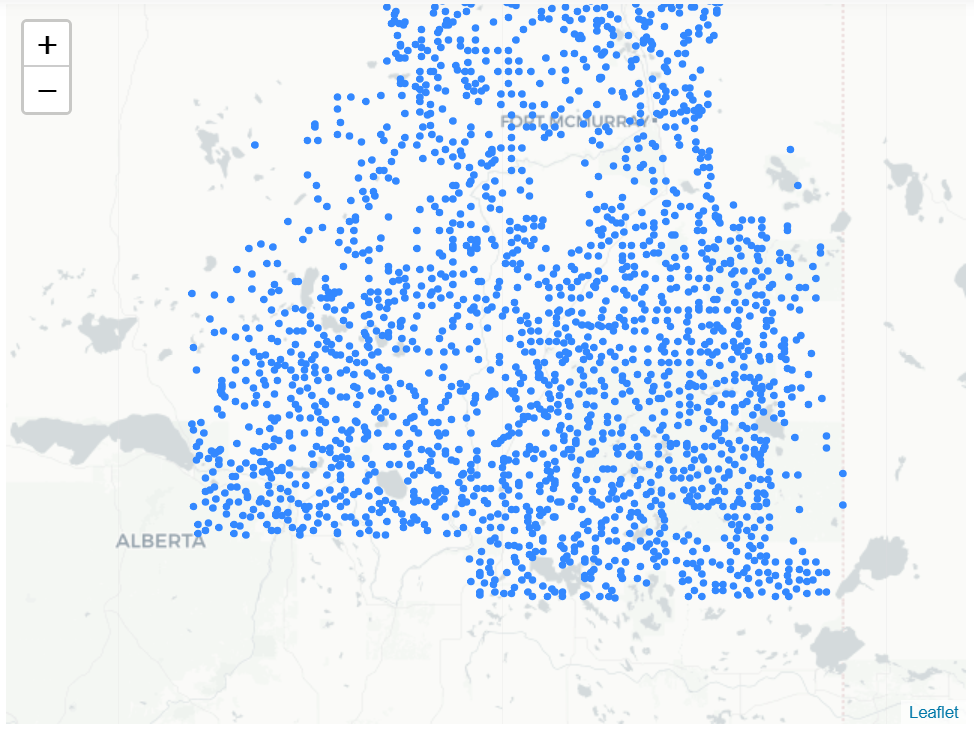

In [9]:
from IPython.display import Image
Image(filename='data/well_map.png', width=650) 

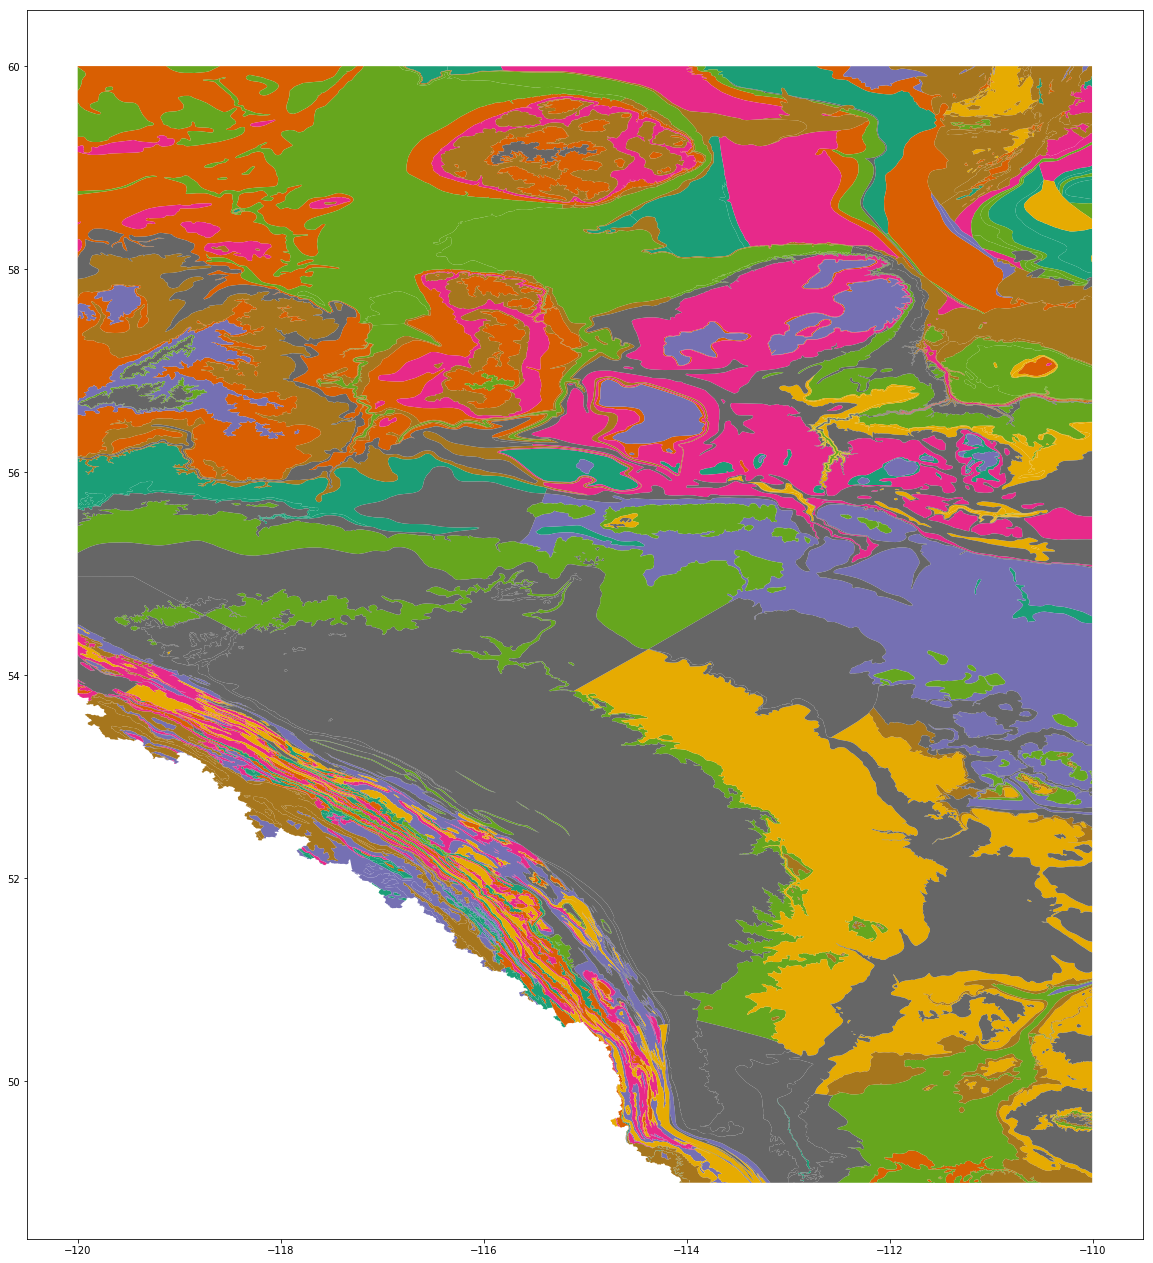

In [22]:
import geopandas as gpd

%matplotlib inline

bedrock_shp = gpd.read_file("data/MAP_600/DIG_2013_0018/bdrk_py_ll.shp")
bedrock_shp.plot(cmap='Dark2', figsize=(20,40))

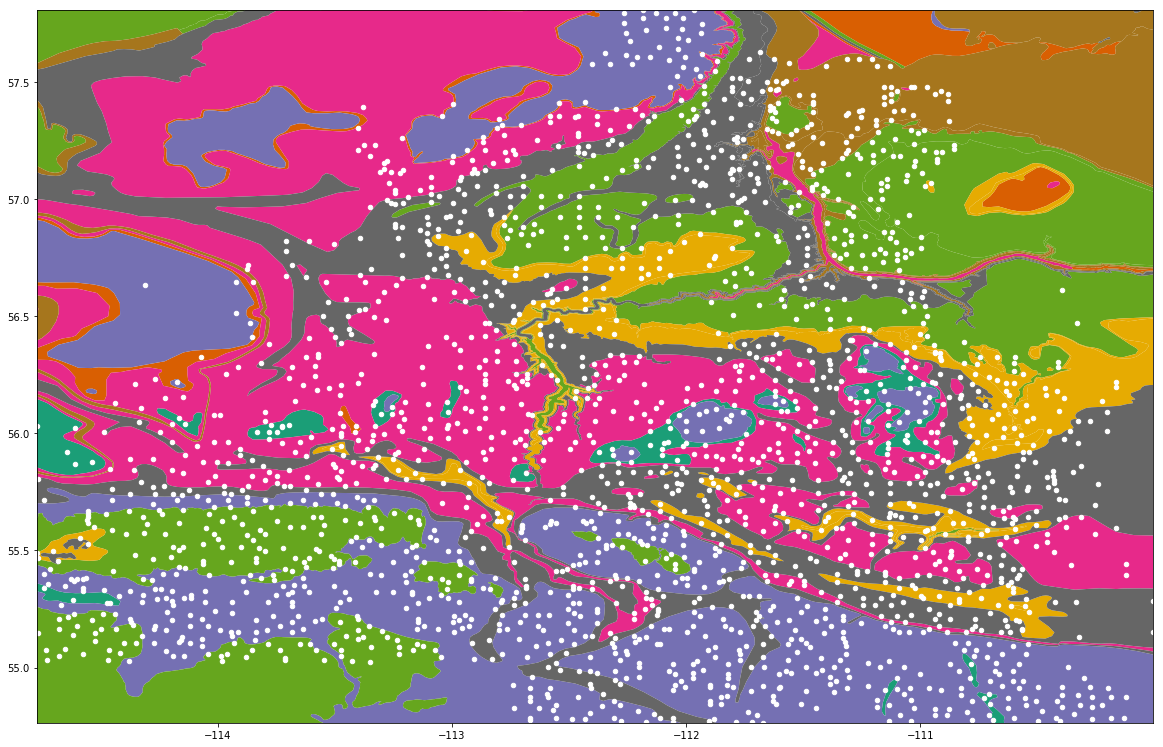

In [32]:
from shapely.geometry import Point, Polygon

geom = [Point(xy) for xy in zip(well_locations['lng'],well_locations['lat'])]
geo_df = gpd.GeoDataFrame(well_locations, geometry =geom)
geo_df.head()



ax = bedrock_shp.plot(cmap='Dark2', figsize=(20,40))

minx, miny, maxx, maxy = geo_df.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

geo_df.plot(markersize=20, ax=ax, color="white")

In [41]:
geom = [Point(xy) for xy in zip(well_locations['lng'],well_locations['lat'])]
well_geodf = gpd.GeoDataFrame(well_locations, geometry =geom)

map_wells = folium.Map(location=well_center_coord, zoom_start=7,tiles='Stamen Terrain', width = 640, height=480)

for index, row in well_locations.iterrows():
  folium.CircleMarker(location=[row['lat'], row['lng']], radius=1).add_to(map_wells)

#well_geodf.head()

map_wells.add_child(folium.LatLngPopup())

map_wells